# Regresión Logística

Objetivo: Se pondran en práctica las herramientas para pre-procesamiento de datos. Obtener mínimo un 82% de precisión y matriz de confusión.

- Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Tiempo máximo: 2 horas

- Nota: Pre-procesar los datos para obtener un error menor

La regresión logística predice la probabilidad de que un elemento pertenezca a la clase 0 ó 1 aplicando la función sigmoide a una función lineal

$$y(x) = g(w^Tx + b)$$ 

donde $g(z)$ es la función sigmoide

$$ \sigma(z) = \frac{1}{1+ e^{-z}} $$

## Importar bibliotecas y dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

data = pd.read_csv('titanic_train.csv') # Dataset de entrenamiento
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análisis exploratorio
 

In [2]:
des = data.describe()
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


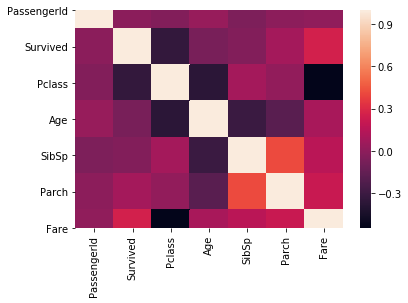

In [3]:
corr = data.corr()
sns.heatmap(corr)

## Solución
* Eliminar características no necesarias
* Convertir a variables numéricas

- Visualizando variables por clase y sexo

In [4]:
c = data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

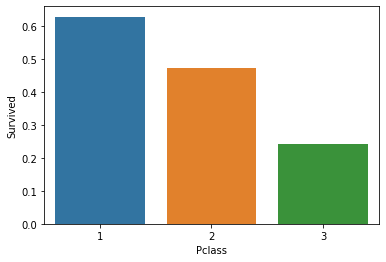

In [5]:
sns.barplot('Pclass','Survived', data=c)

In [6]:
d = data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

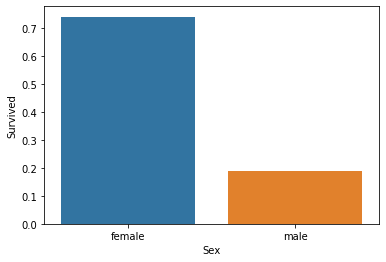

In [7]:
sns.barplot('Sex','Survived', data=d)

## Faltan valores en edad
- Conocer valores nulos con 'info()'
- El método de 'heatmap' recibe 'data.isnull()' para visualizar los valores nulos 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


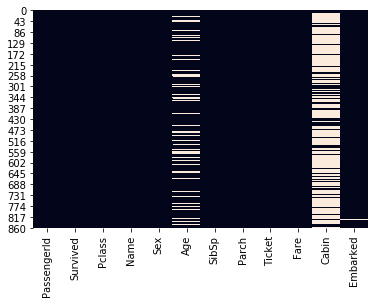

In [9]:
sns.heatmap(data.isnull(), cbar=False)

In [10]:
data[:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- La variable de edad está incompleta

### Llenar valores perdidos
- Se asigna la media de la edad o se completan los valores con SimpleImputer

In [11]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


## Asigna los valores con 'fillna' y 'median'

In [12]:
#data['Age'].fillna(data['Age'].median(),inplace=True)

In [13]:
data.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


### Eliminar la características que no aportan información

In [14]:
data.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Convierte variables tipo caracter a valores numéricos

- Usando 'replace' para convertir variables

In [15]:
data = data.replace({'Sex':{'male':0, 'female':1}})

In [16]:
data = data.replace({'Embarked': {'S':0, 'C':1, 'Q':2}})
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


## SimpleImputer para valores faltantes de edad

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
data_complete = imputer.fit_transform(data.drop('Survived',axis=1))

In [18]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


## Verificar datos nulos con 'heatmap'

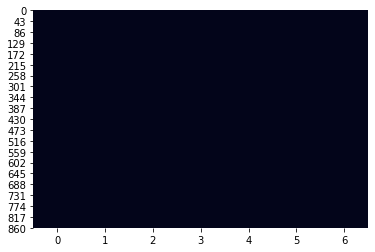

In [19]:
dc = pd.DataFrame(data_complete)
sns.heatmap(dc.isnull(), cbar=False)

## Entrenamiento y predicción con Regresión Logística




- Importar de sklearn el modelo

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_complete, 
                                                    data['Survived'], test_size=0.3,
                                                    random_state=11)
import warnings
warnings.filterwarnings('ignore')

In [26]:
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
logmodel.score(X_test, y_test)

0.8395522388059702

In [22]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       176
           1       0.79      0.73      0.76        92

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[158,  18],
       [ 25,  67]])

- True positive: 158 (Predicción positiva que es positiva)
- True negative: 67 (Predicción negativa que es negativa)
- False negative: 18 (Predicción negativa que es positiva)
- False positive: 25 (Predicción positiva que es negativa)

- El resultado depende de la partición del conjunto de entrenamiento y prueba. Usar 'random_state' para repetir experimento con mismo conjunto de datos